In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
sns.set()

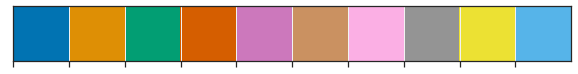

In [75]:
colors = sns.color_palette("colorblind")
# sns.palplot(sns.color_palette("Paired"))
sns.palplot(colors)
sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid': True,'grid.color': '.95', 'grid.linestyle': '-'})

In [2]:
df_positives = pd.read_csv('../data/datasets/visits_sp_unique_train_positivo_1000_random_0.csv', index_col=0)

In [3]:
df_negatives = pd.read_csv('../data/datasets/visits_sp_unique_train_positivo_0_negative_1000.csv', index_col=0)

In [4]:
df_random = pd.read_csv('../data/datasets/visits_sp_unique_train_positivo_0_random_1000.csv', index_col=0)

In [14]:
df_shuffled = pd.read_csv('../data/datasets/visits_sp_unique_train_shuffled_snps_positivo_1000_random_0.csv', index_col=0)

In [15]:
df_positives_snps = df_positives[[c for c in df_positives.columns if 'snp' in c]]

In [16]:
positives_snps_occ = (df_positives_snps > 0).values.sum(axis=0)

In [17]:
df_negatives_snps = df_negatives[[c for c in df_negatives.columns if 'snp' in c]]

In [18]:
negatives_snps_occ = (df_negatives_snps > 0).values.sum(axis=0)

In [19]:
df_random_snps = df_random[[c for c in df_random.columns if 'snp' in c]]

In [20]:
random_snps_occ = (df_random_snps > 0).values.sum(axis=0)

In [21]:
df_shuffled_snps = df_shuffled[[c for c in df_shuffled.columns if 'snp' in c]]

In [22]:
shuffled_snps_occ = (df_shuffled_snps > 0).values.sum(axis=0)

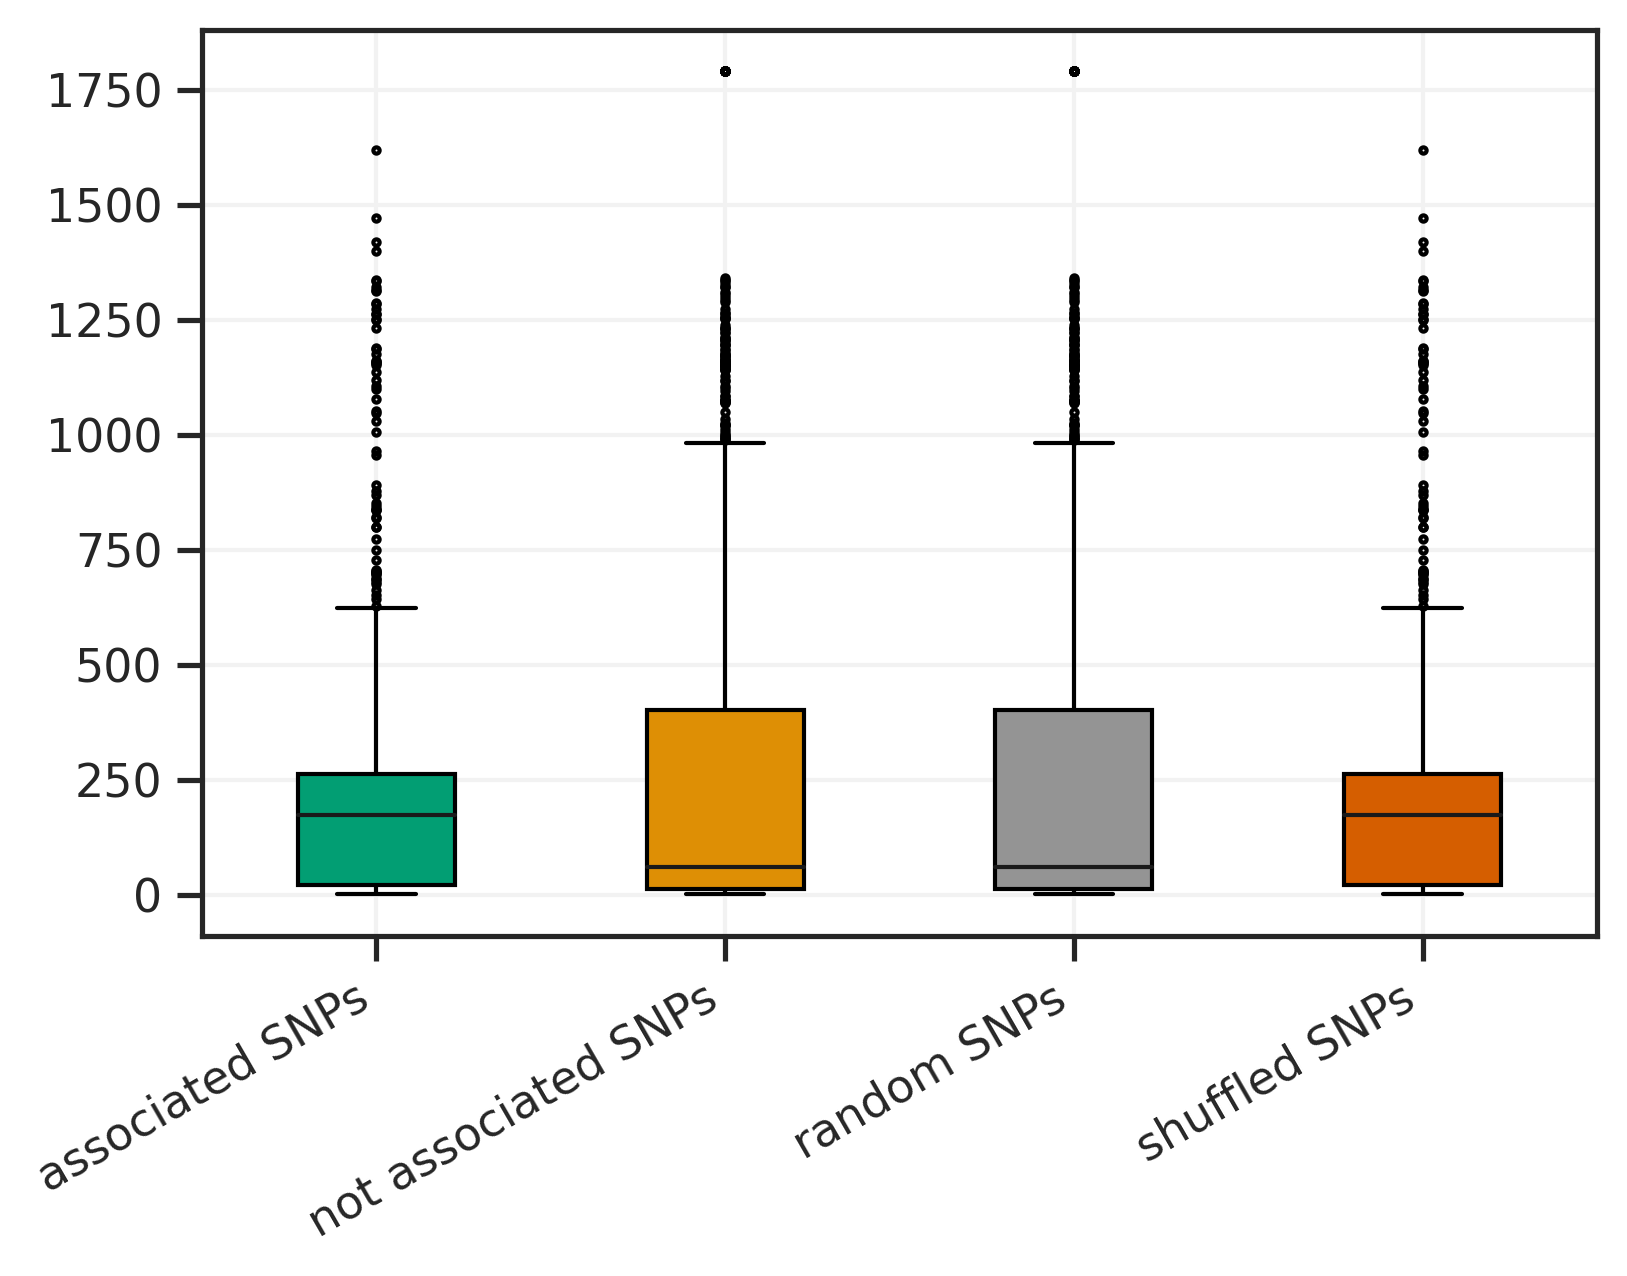

In [98]:
fig = plt.figure(dpi=300)
box = plt.boxplot([positives_snps_occ, negatives_snps_occ, random_snps_occ, shuffled_snps_occ], labels=['associated SNPs', 'not associated SNPs', 'random SNPs','shuffled SNPs'], patch_artist=True, medianprops=dict(color='k'), flierprops=dict(marker='.', markersize=3))
plt.xticks(rotation=30, ha='right')
c = [colors[2], colors[1], colors[7], colors[3]]
 
for patch, color in zip(box['boxes'], c):
    patch.set_facecolor(color)


## IMPORTANT
Despite different SNP names (column names) the occurrence of recessive alleles in not associated SNPs and random SNPs sets are oddly equal!!!
The swarmplot bellow are disturbing. (Falar com o Marcio sobre esses conjuntos)
  

(array([0, 1, 2, 3]),
 [Text(0, 0, 'associated SNPs'),
  Text(1, 0, 'not associated SNPs'),
  Text(2, 0, 'random SNPs'),
  Text(3, 0, 'shuffled SNPs')])

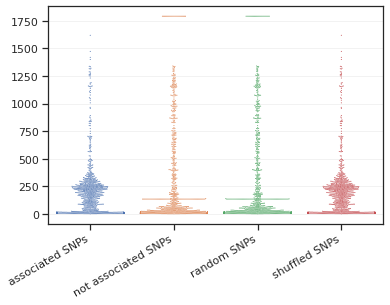

In [134]:
# plt.figure(dpi=300)
swp = sns.swarmplot(data=[positives_snps_occ, negatives_snps_occ, random_snps_occ, shuffled_snps_occ], size=1);
swp.set_xticklabels(['associated SNPs', 'not associated SNPs', 'random SNPs','shuffled SNPs'])
plt.xticks(rotation=30, ha='right')
